#Single layer perceptron

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("Placement.csv")

In [ ]:
df.head()

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0
3,4,7.4,132,1
4,5,5.8,142,0


In [ ]:
df.drop("Student_ID",axis=1,inplace=True)

In [ ]:
df.head()

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [ ]:
from mlxtend.plotting import plot_decision_regions

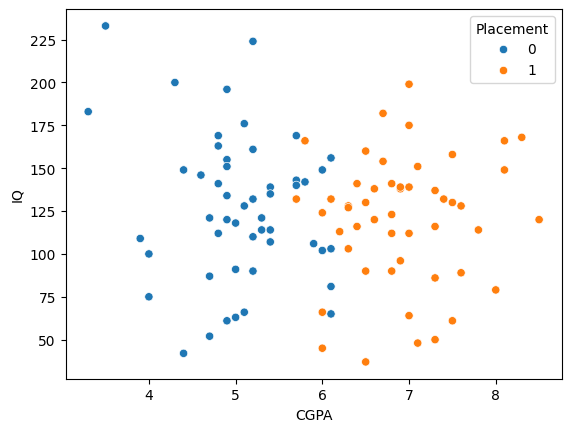

In [ ]:
sns.scatterplot(x="CGPA",y="IQ",data=df,hue="Placement")
plt.show()

In [ ]:
x=df.iloc[:,:-1]

In [ ]:
x

,CGPA,IQ
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [ ]:
y=df["Placement"]

In [ ]:
y

,Placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=175)

In [ ]:
df.shape

(100, 3)

In [ ]:
x_train.shape

(80, 2)

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
pt=Perceptron()

In [ ]:
pt.fit(x_train,y_train)

Perceptron()

In [ ]:
pt.score(x_train,y_train)*100,pt.score(x_test,y_test)*100

(75.0, 75.0)

<Axes: >

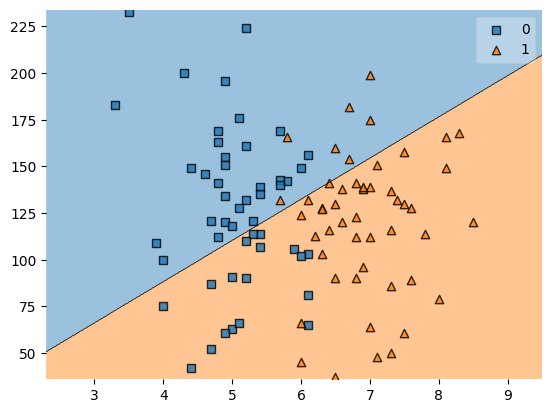

In [ ]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=pt)

#Multilayer Perceptron

In [ ]:
df=pd.read_csv("Customer_Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(["RowNumber","CustomerId","Surname","Geography","Gender"],axis=1,inplace=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.isnull().sum()

,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


In [ ]:
x=df.iloc[:,:-1]

In [ ]:
y=df.iloc[:,-1]

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
import tensorflow

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,BatchNormalization,Dropout

In [ ]:
ann=Sequential()

In [ ]:
#input_dimen
x_train.shape

(8000, 8)

In [ ]:
ann.add(Dense(6,input_dim=8,activation="relu",kernel_regularizer="l2"))
#ann.add(BatchNormalization())
ann.add(Dropout(0.5))
ann.add(Dense(4,activation="relu"))
ann.add(Dropout(0.5))
#ann.add(BatchNormalization())
ann.add(Dense(2,activation="relu"))
ann.add(Dropout(0.5))
#ann.add(BatchNormalization())
ann.add(Dense(1,activation="sigmoid"))

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
#batch
x_train.shape

(8000, 8)

In [ ]:
ann.fit(x_train,y_train,epochs=50,batch_size=100,validation_data=(x_test,y_test),callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5)])

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7193 - loss: 0.7593 - val_accuracy: 0.8040 - val_loss: 0.7170
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7782 - loss: 0.7102 - val_accuracy: 0.8035 - val_loss: 0.6819
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8001 - loss: 0.6747 - val_accuracy: 0.8035 - val_loss: 0.6532
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7893 - loss: 0.6495 - val_accuracy: 0.8035 - val_loss: 0.6290
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7877 - loss: 0.6269 - val_accuracy: 0.8035 - val_loss: 0.6022
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7891 - loss: 0.6016 - val_accuracy: 0.8035 - val_loss: 0.5662
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7942 - loss: 0.5693 - val_accuracy: 0.8035 - val_loss: 0.5304
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7977 - loss: 0.5501 - val_accuracy: 0.8035 - val_loss:

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
prd=ann.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred=[]
for i in prd:
  if i>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
accuracy_score(y_test,y_pred)*100

80.35

In [ ]:
prd_train=ann.predict(x_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred_train=[]
for i in prd_train:
  if i>0.5:
    y_pred_train.append(1)
  else:
    y_pred_train.append(0)

In [ ]:
accuracy_score(y_train,y_pred_train)*100

79.45

In [ ]:
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811
4684,-0.284834,0.388871,-1.387538,-1.225848,0.807737,0.646092,0.970243,0.804921
1731,-0.512463,0.484225,-0.350204,-1.225848,0.807737,0.646092,-1.030670,-0.722147
4742,-1.495407,1.914528,1.032908,0.683816,0.807737,0.646092,0.970243,1.227481
4521,-0.936681,-1.136786,0.687130,0.777477,-0.911583,0.646092,0.970243,0.253524
...,...,...,...,...,...,...,...,...
6412,-0.502117,1.342407,-0.004426,0.349118,-0.911583,-1.547768,0.970243,-0.957298
8285,-0.429689,-1.327494,1.724464,-1.225848,-0.911583,-1.547768,0.970243,0.170498
7853,0.822271,0.770285,0.687130,-1.225848,-0.911583,0.646092,-1.030670,-1.160142
1095,0.429093,-0.946079,-0.350204,-1.225848,-0.911583,0.646092,-1.030670,-0.405759


In [ ]:
prd=ann.predict(np.array([[-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811]]))
prd_data=[]
for i in prd:
  if i>0.5:
    prd_data.append(1)
  else:
    prd_data.append(0)
prd_data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


[0]

In [ ]:
y_test

,Exited
6252,0
4684,0
1731,0
4742,0
4521,0
...,...
6412,1
8285,0
7853,1
1095,1


In [ ]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


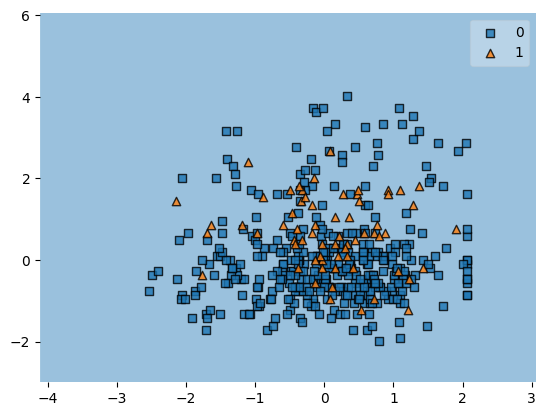

In [ ]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Specify filler values for the additional dimensions
filler_feature_values = {i: 0.0 for i in range(x.shape[1]) if i not in [0, 1]}  # Assuming you keep features 0 and 1
filler_feature_ranges = {i: 1.0 for i in range(x.shape[1]) if i not in [0, 1]}  # Example range for visualization

# Plot decision regions
fig, ax = plt.subplots()
plot_decision_regions(
    X=x.to_numpy(),
    y=y.to_numpy().astype(int),
    clf=ann,
    filler_feature_values=filler_feature_values,
    filler_feature_ranges=filler_feature_ranges,
    ax=ax
)
plt.show()
